In [1]:
import pandas as pd
import sqlalchemy as sqla
from sqlalchemy import create_engine
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.options.mode.chained_assignment=None
%matplotlib inline
import os
import pymysql
import sys
import datetime

In [2]:
URI = "database-1.cyhnb62nmtav.eu-west-1.rds.amazonaws.com"
PORT = "3306"
DB = "dbbikes"
USER = "kuroko"
PASSWARD = "11223344"

engine = create_engine("mysql+mysqlconnector://{}:{}@{}:{}/{}".format(USER, PASSWARD, URI, PORT, DB))

In [3]:
df = pd.read_sql_table("availability", engine, parse_dates="True", index_col=0)
display(df.head())

,number,available_bikes,available_bike_stands,last_update
0,42,30,0,1646881143000
1,30,11,9,1646881067000
2,54,0,33,1646881296000
3,108,8,27,1646881295000
4,56,13,27,1646881294000


In [4]:
df.sort_values(by="number").head
print(df.shape)

(459073, 4)


In [5]:
type(df['last_update'])

pandas.core.series.Series

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459073 entries, 0 to 459072
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   number                 459073 non-null  object
 1   available_bikes        459073 non-null  object
 2   available_bike_stands  459073 non-null  object
 3   last_update            459073 non-null  object
dtypes: object(4)
memory usage: 14.0+ MB


In [7]:
df['number'] = df['number'].astype('int64')
df['available_bikes'] = df['available_bikes'].astype('int64')
df['available_bike_stands'] = df['available_bike_stands'].astype('int64')
df['last_update'] = df['last_update'].astype('int64')


In [8]:
df['last_update'] = df['last_update'].astype('int64')
df['last_update'] = df['last_update']//1000
df['last_update'] = df['last_update'].astype(str)
df['last_update']

0         1646881143
1         1646881067
2         1646881296
3         1646881295
4         1646881294
             ...    
459068    1649279216
459069    1649278681
459070    1649278835
459071    1649278918
459072    1649278653
Name: last_update, Length: 459073, dtype: object

In [9]:
df['last_update'] = pd.to_datetime(df['last_update'], unit='s')
df['last_update']

0        2022-03-10 02:59:03
1        2022-03-10 02:57:47
2        2022-03-10 03:01:36
3        2022-03-10 03:01:35
4        2022-03-10 03:01:34
                 ...        
459068   2022-04-06 21:06:56
459069   2022-04-06 20:58:01
459070   2022-04-06 21:00:35
459071   2022-04-06 21:01:58
459072   2022-04-06 20:57:33
Name: last_update, Length: 459073, dtype: datetime64[ns]

In [10]:
df['day_of_week'] = df['last_update'].dt.dayofweek + 1
df['date'] = df['last_update'].dt.date

In [11]:
df['hour'] = df['last_update'].dt.hour
df['hour'].unique()

array([ 2,  3, 10,  9,  1, 16, 17, 18, 19, 20, 21, 22, 23,  0,  4,  5,  6,
        7,  8, 11, 12, 13, 14, 15], dtype=int64)

In [12]:
df['hour'] = df['last_update'].dt.hour
df.tail(10)

,number,available_bikes,available_bike_stands,last_update,day_of_week,date,hour
459063,3,1,19,2022-04-06 21:00:44,3,2022-04-06,21
459064,40,14,7,2022-04-06 21:04:54,3,2022-04-06,21
459065,29,18,11,2022-04-06 21:06:33,3,2022-04-06,21
459066,103,0,40,2022-04-06 21:07:16,3,2022-04-06,21
459067,28,17,13,2022-04-06 21:03:41,3,2022-04-06,21
459068,39,7,13,2022-04-06 21:06:56,3,2022-04-06,21
459069,83,7,33,2022-04-06 20:58:01,3,2022-04-06,20
459070,92,33,7,2022-04-06 21:00:35,3,2022-04-06,21
459071,21,4,26,2022-04-06 21:01:58,3,2022-04-06,21
459072,88,9,21,2022-04-06 20:57:33,3,2022-04-06,20


In [13]:
df.dtypes

number                            int64
available_bikes                   int64
available_bike_stands             int64
last_update              datetime64[ns]
day_of_week                       int64
date                             object
hour                              int64
dtype: object

In [14]:
# Create dataframe and store data running SQL query
rows = engine.execute("SELECT * from dbbikes.weather;")
df2 = []
for row in rows:
        df2.append(dict(row))
df2=pd.DataFrame(df2)
# Examine dataframe object, show first 10 rows
df2.head(10)

,dt,description,icon,temperture,pressure,humidity,visibility
0,1647201841,scattered clouds,03n,281.08,1006,74,10000
1,1647023435,broken clouds,04n,282.22,993,84,10000
2,1647025107,broken clouds,04n,281.92,993,87,10000
3,1647201841,scattered clouds,03n,281.08,1006,74,10000
4,1647201041,scattered clouds,03n,280.94,1005,74,10000
5,1647181434,broken clouds,04d,284.58,997,70,10000
6,1647201841,scattered clouds,03n,281.08,1006,74,10000
7,1647201041,scattered clouds,03n,280.94,1005,74,10000
8,1647028909,broken clouds,04n,280.94,994,90,10000
9,1647025521,broken clouds,04n,281.72,994,88,10000


In [15]:
df2['dt'] = pd.to_datetime(df2['dt'], unit='s')
df2['date'] = df2['dt'].dt.date
df2['hour'] = df2['dt'].dt.hour

In [16]:
# Merge dataframes
mergedStuff = pd.merge(df, df2, on = ['date', 'hour'], how = 'inner')
# Show first 2 scraps (oldest) for stations (113*2=226)
mergedStuff.head(226)

,number,available_bikes,available_bike_stands,last_update,day_of_week,date,hour,dt,description,icon,temperture,pressure,humidity,visibility
0,54,0,33,2022-03-10 03:01:36,4,2022-03-10,3,2022-03-10 03:51:01,broken clouds,04n,277.69,1008,96,6000
1,108,8,27,2022-03-10 03:01:35,4,2022-03-10,3,2022-03-10 03:51:01,broken clouds,04n,277.69,1008,96,6000
2,56,13,27,2022-03-10 03:01:34,4,2022-03-10,3,2022-03-10 03:51:01,broken clouds,04n,277.69,1008,96,6000
3,6,10,10,2022-03-10 03:00:35,4,2022-03-10,3,2022-03-10 03:51:01,broken clouds,04n,277.69,1008,96,6000
4,18,12,18,2022-03-10 03:01:36,4,2022-03-10,3,2022-03-10 03:51:01,broken clouds,04n,277.69,1008,96,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,11,14,16,2022-03-10 03:01:26,4,2022-03-10,3,2022-03-10 03:51:01,broken clouds,04n,277.69,1008,96,6000
222,17,1,19,2022-03-10 03:01:30,4,2022-03-10,3,2022-03-10 03:51:01,broken clouds,04n,277.69,1008,96,6000
223,45,21,9,2022-03-10 03:09:41,4,2022-03-10,3,2022-03-10 03:51:01,broken clouds,04n,277.69,1008,96,6000
224,114,1,39,2022-03-10 03:01:36,4,2022-03-10,3,2022-03-10 03:51:01,broken clouds,04n,277.69,1008,96,6000


In [17]:
mergedStuff['visibility'].unique()

array(['6000', '10000', '9000', '8000', '5000', '900', '300', '800',
       '2600', '4300', '1500', '600', '500', '2000', '150', '200', '700',
       '3000', '4000', '7000', '4500', '3500'], dtype=object)

In [18]:
# Create a separate dataframe with days of the week (categorical)
data_input1 = pd.DataFrame(mergedStuff['day_of_week'])

# Create a separate dataframe with cloud coverage information (categorical)
data_input2 = pd.DataFrame(mergedStuff['description'])

# Concatenate the two dataframes in the main one
dummy = pd.get_dummies(data_input1)
dummy_2 = pd.get_dummies(data_input2)
mergedStuff = pd.concat([mergedStuff,dummy],axis=1)
mergedStuff = pd.concat([mergedStuff,dummy_2],axis=1)

In [19]:
mergedStuff.columns

Index(['number', 'available_bikes', 'available_bike_stands', 'last_update',
       'day_of_week', 'date', 'hour', 'dt', 'description', 'icon',
       'temperture', 'pressure', 'humidity', 'visibility', 'day_of_week',
       'description_broken clouds', 'description_clear sky',
       'description_few clouds', 'description_fog', 'description_haze',
       'description_light intensity drizzle rain',
       'description_light intensity shower rain', 'description_light rain',
       'description_mist', 'description_moderate rain',
       'description_overcast clouds', 'description_scattered clouds'],
      dtype='object')

In [20]:
# Select model features and store them in a new dataframe
input_model = pd.DataFrame(mergedStuff[['number', 'hour', 'temperture', 
'visibility', 'description_broken clouds', 'description_clear sky',
       'description_few clouds', 'description_fog', 'description_haze',
       'description_light intensity drizzle rain',
       'description_light intensity shower rain', 'description_light rain',
       'description_mist', 'description_moderate rain',
       'description_overcast clouds', 'description_scattered clouds']])

# Define target variable
output = mergedStuff['available_bikes']

# Split dataset to train and test
X_train,X_test,Y_train,Y_test=train_test_split(input_model,output,test_size=0.33,random_state=42)
print("Training the model on %s rows and %s columns." % X_train.shape)

# Instantiate RandomForestRegressor object calling 100 decision tree models
rf = RandomForestRegressor(n_estimators=100)

# Train the model
rf.fit(X_train, Y_train)

print("Testing the model on %s rows." % Y_test.shape[0])


Training the model on 307025 rows and 16 columns.


C:\Users\alexhuang\.conda\envs\comp47350py38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


Testing the model on 151222 rows.


In [21]:
LinearReg=LinearRegression()
LinearReg.fit(X_train,Y_train)
pred=LinearReg.predict(X_test)
pred1=pd.DataFrame(pred)
print (pred1)
print(X_test)
print(np.array(X_test))

C:\Users\alexhuang\.conda\envs\comp47350py38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\alexhuang\.conda\envs\comp47350py38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


                0
0       12.118454
1       12.346739
2       12.871288
3       12.531634
4       12.061047
...           ...
151217  12.020771
151218  12.926141
151219  12.640836
151220  12.429920
151221  12.582312

[151222 rows x 1 columns]
        number  hour temperture visibility  description_broken clouds  \
80117       53    17     285.93      10000                          0   
170795       8     8     282.36      10000                          0   
382858      56     1     274.62      10000                          0   
341721       6    23     275.58      10000                          0   
294238      18    14     285.65       7000                          1   
...        ...   ...        ...        ...                        ...   
174646      33    12     288.57      10000                          0   
351372      86    11     279.63      10000                          0   
142071      79    20     281.83      10000                          1   
148864      36     4     28

In [22]:
# Get prediction for test cases
prediction = rf.predict(X_test)

# Show the predicted test cases
print(prediction)
print(Y_test)

C:\Users\alexhuang\.conda\envs\comp47350py38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


[ 1.         10.81561294 10.         ...  6.02        9.
 12.29312698]
80117      1
170795    15
382858    10
341721    18
294238     5
          ..
174646    19
351372     4
142071     6
148864     9
142584    12
Name: available_bikes, Length: 151222, dtype: int64


In [23]:
print("RMSE: %f" % np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

RMSE: 1.581856


In [42]:
df.dropna(inplace=True)
df = df[df.available_bikes > 0]

,last_update,available_bikes,log
0,2022-03-10 02:59:03,30,3.401197
110,2022-03-04 10:11:49,16,2.772589
220,2022-03-10 02:59:03,30,3.401197
330,2022-03-10 03:09:09,30,3.401197
440,2022-03-10 02:59:03,30,3.401197
...,...,...,...
54450,2022-03-17 09:34:36,29,3.367296
54560,2022-03-17 09:39:20,29,3.367296
54670,2022-03-17 09:51:10,28,3.332205
54780,2022-03-17 09:51:37,28,3.332205


(4152, 3)


<AxesSubplot:xlabel='last_update', ylabel='log'>

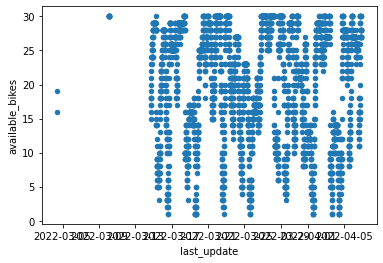

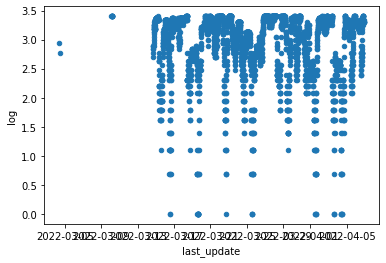

In [43]:
station_1 = df[df["number"] == 42]
station_1["log"] = np.log(station_1["available_bikes"]) 
station_1_test = station_1[["last_update", "available_bikes", "log"]]
display(station_1_test.head(500))
print(station_1_test.shape)
station_1_test.plot.scatter(x = "last_update", y = "available_bikes")
station_1_test.plot.scatter(x = "last_update", y = "log")


,last_update,available_bikes
1,2022-03-10 02:57:47,11
111,2022-03-04 10:08:30,5
221,2022-03-10 02:57:47,11
331,2022-03-10 03:07:53,11
441,2022-03-10 03:07:53,11
...,...,...
104391,2022-03-19 22:18:16,1
104501,2022-03-19 22:18:16,1
104611,2022-03-19 22:28:22,1
104721,2022-03-19 22:36:59,3


(3268, 2)


<AxesSubplot:xlabel='last_update', ylabel='available_bikes'>

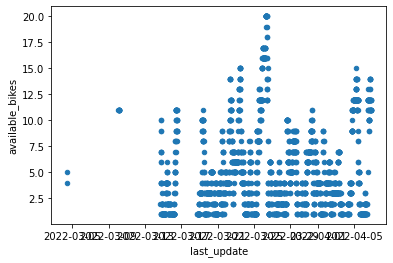

In [44]:
station_2 = df[df["number"] == 30]
station_2_test = station_2[["last_update", "available_bikes"]]
display(station_2_test.head(500))
print(station_2_test.shape)
station_2_test.plot.scatter(x = "last_update", y = "available_bikes")

In [45]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(station_1_test['available_bikes'], autolag = "AIC")
print("P-value", dftest[1])

P-value 6.090308516804566e-09


C:\Users\alexhuang\.conda\envs\comp47350py38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


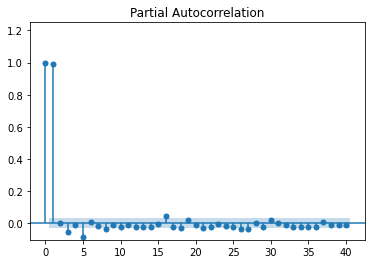

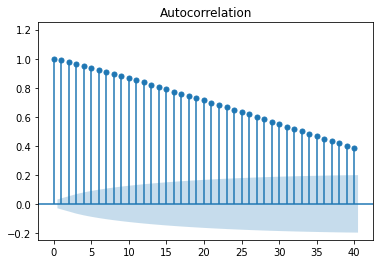

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(station_1_test["available_bikes"], lags = 40, auto_ylims=True)
acf = plot_acf(station_1_test["available_bikes"], lags = 40, auto_ylims=True)

In [47]:
import math
X = station_1_test["available_bikes"].values
train = X[:math.ceil(len(station_1_test) * (2/3))]
test = X[math.ceil(len(station_1_test) * (2/3)):]
Y = station_1_test["log"].values
train1 = Y[:len(station_1_test) - 288 - 1]
test1 = Y[len(station_1_test) - 288 - 1:]

In [49]:
model = AutoReg(train, lags = 500).fit()
logmodel = AutoReg(train1, lags = 500).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2768
Model:                   AutoReg(500)   Log Likelihood               -3095.384
Method:               Conditional MLE   S.D. of innovations              0.947
Date:                Wed, 06 Apr 2022   AIC                           7194.767
Time:                        22:15:22   BIC                          10069.547
Sample:                           500   HQIC                          8243.622
                                 2768                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5620      0.230      2.448      0.014       0.112       1.012
y.L1           1.0076      0.021     48.012      0.000       0.967       1.049
y.L2           0.0065      0.030      0.220      0.8

In [50]:
pred = model.predict(start= len(train), end = len(X) - 1, dynamic=False)
pred2 = logmodel.predict(start= len(train1), end = len(X) - 1, dynamic=False)

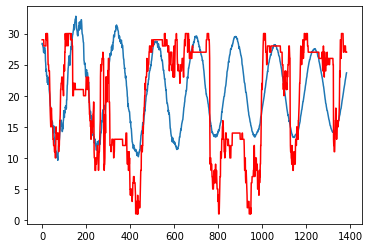

In [51]:
plt.plot(pred)
plt.plot(test, color = 'red')

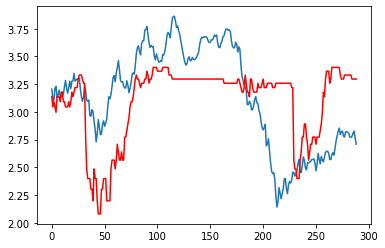

In [52]:
plt.plot(pred2)
plt.plot(test1, color = 'red')